### **Logit and Probit Models**
**Logit and Probit Models** are used for predicting binary outcomes (e.g., success/failure, yes/no) and are types of **Generalized Linear Models (GLM)**, commonly used in agriculture, economics, and social sciences.

### **1. Logit Model (Logistic Regression)**
- **Purpose**: Predict binary outcomes using a logistic function.
- **Advantages**: Provides a probability between 0 and 1, useful for interpreting outcomes like technology adoption or crop success.
- **Agriculture Use**: Predicting whether farmers adopt new technologies or participate in subsidy programs.

### **2. Probit Model**
- **Purpose**: Like Logit, but uses the normal cumulative distribution function (CDF).
- **Advantages**: Preferred when data follows a normal distribution. 
- **Agriculture Use**: Predicting farm decisions like subsidy participation or crop success based on factors like weather.

### **Key Differences**:
1. **Link Function**: Logit uses a **logistic function**; Probit uses a **normal distribution**.
2. **Interpretability**: Logit coefficients are easier to interpret as odds ratios; Probit coefficients are more complex.
3. **Use Case**: Logit is often preferred for ease of interpretation; Probit is used when data fits a normal distribution.

---

### **Applications in Agriculture**:
- **Logit**: Predicting farmer adoption of AI/tech or participation in programs.
- **Probit**: Predicting crop success or high yields based on variables like weather or fertilizer use.

Both models are valuable for analyzing binary agricultural outcomes, helping guide decisions like technology adoption and program participation.

# Use Case 1. Predicting Adoption of AI Techniques in Agriculture

Dataset headers and first few rows:
    FarmSize        Age        Income  AccessCredit  Education    Rainfall  \
0  59.934283  36.858063  35224.293715             1          0  764.594856   
1  47.234714  41.334006  34249.853888             1          1  915.487297   
2  62.953771  37.831427  15952.202313             0          1  571.609129   
3  80.460597  46.325017  38693.763326             0          0  540.740206   
4  45.316933  59.366142   7648.759866             1          1  835.789211   

   TechSavvy  GovtSupport  AccessInternet  AdoptAI  
0          1            0               1        0  
1          0            1               1        1  
2          1            1               1        0  
3          0            0               1        0  
4          1            1               1        0  
Optimization terminated successfully.
         Current function value: 0.692794
         Iterations 3

Logit Model Results:
                           Logit Regression Results  

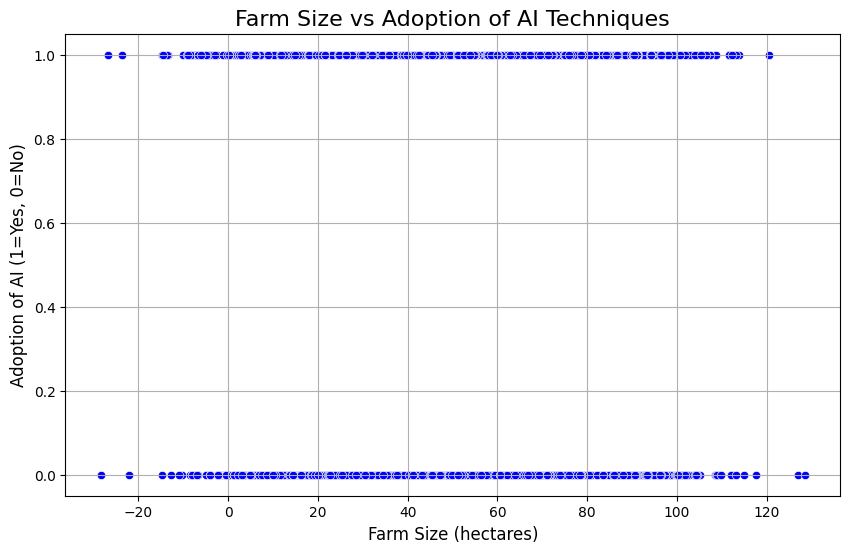

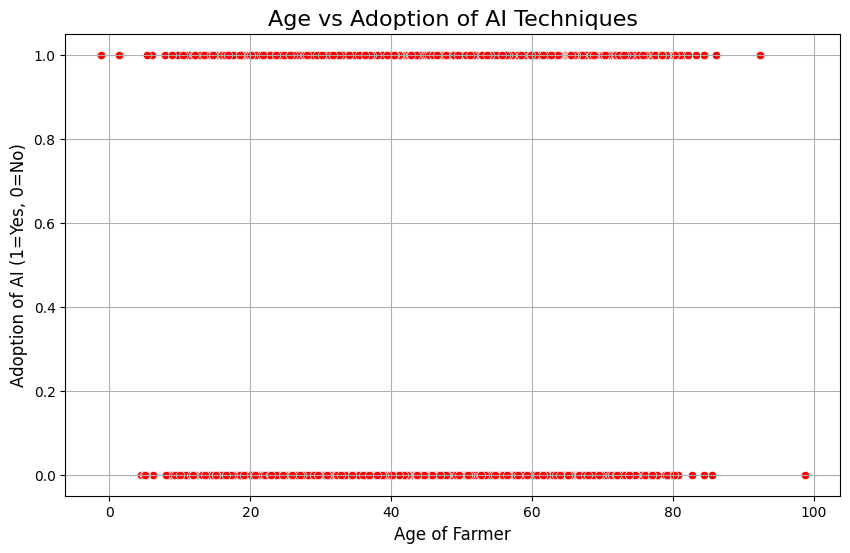

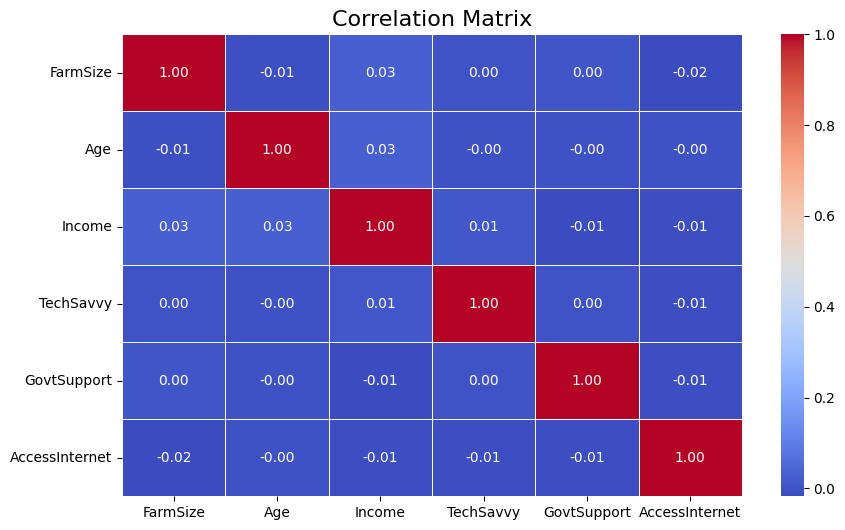

C:\Users\rudra\AppData\Local\Temp\ipykernel_20864\4079274193.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AdoptAI', y='Income', data=df, palette='Set2')


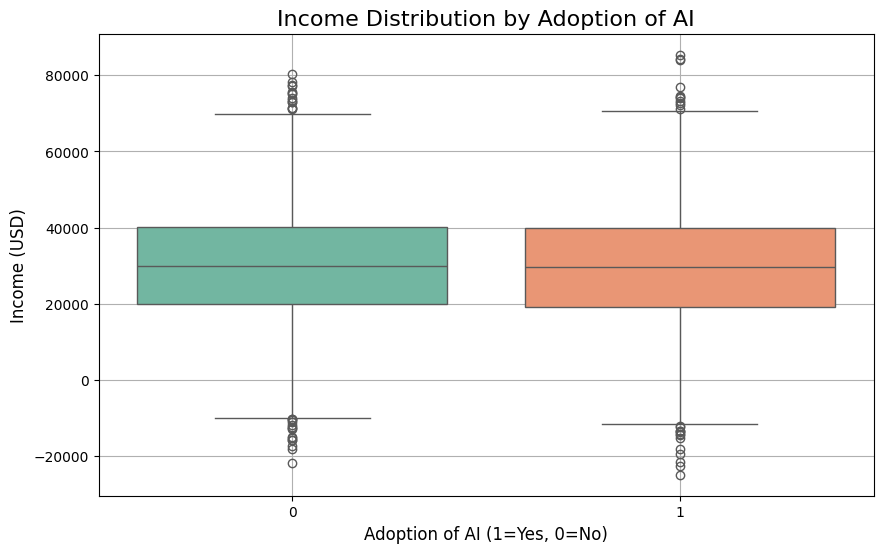

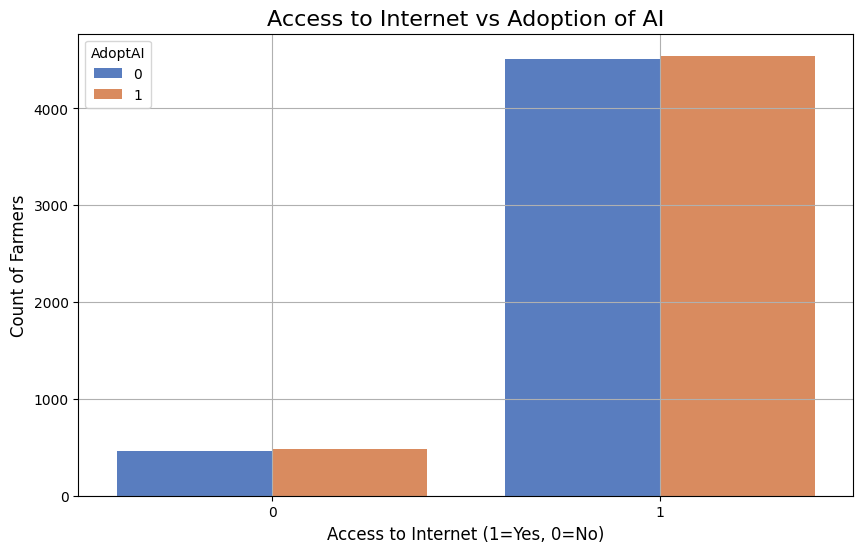

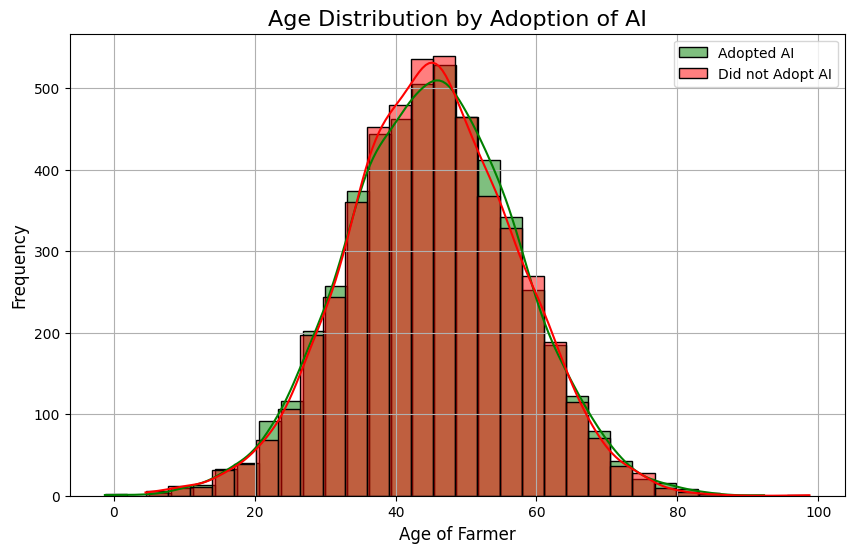

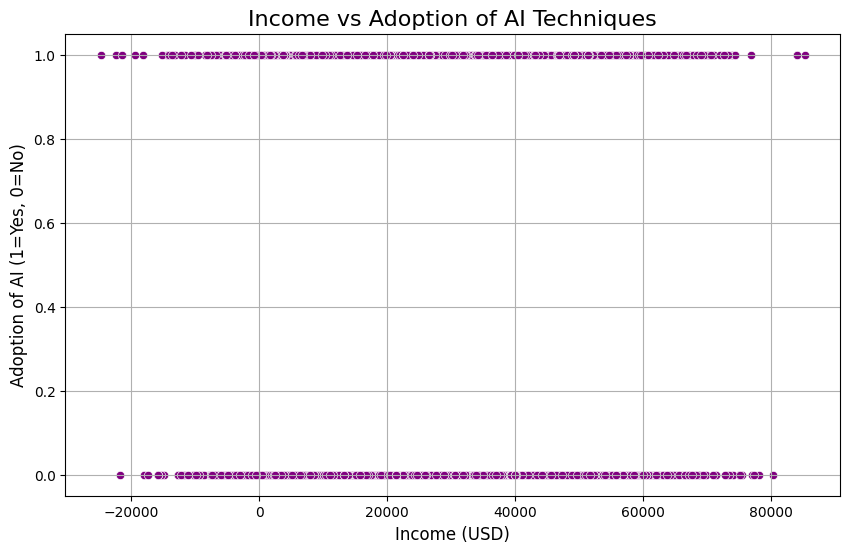

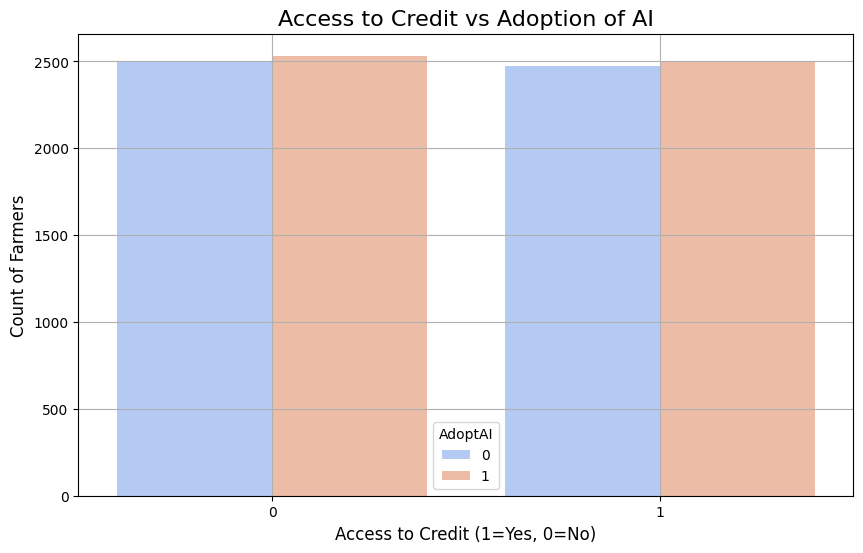

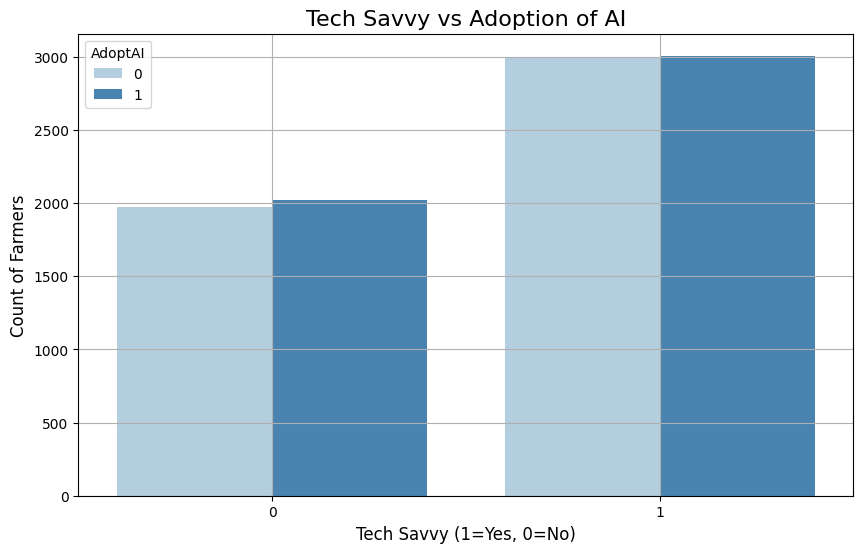

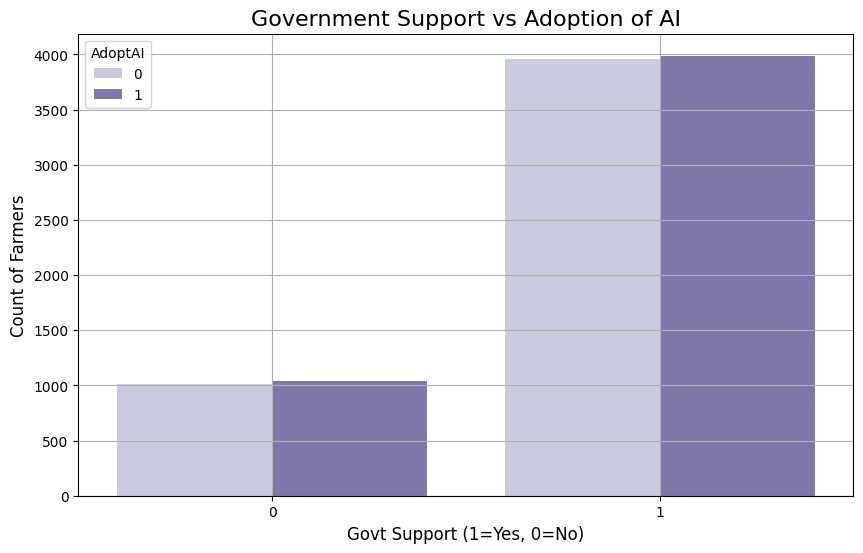

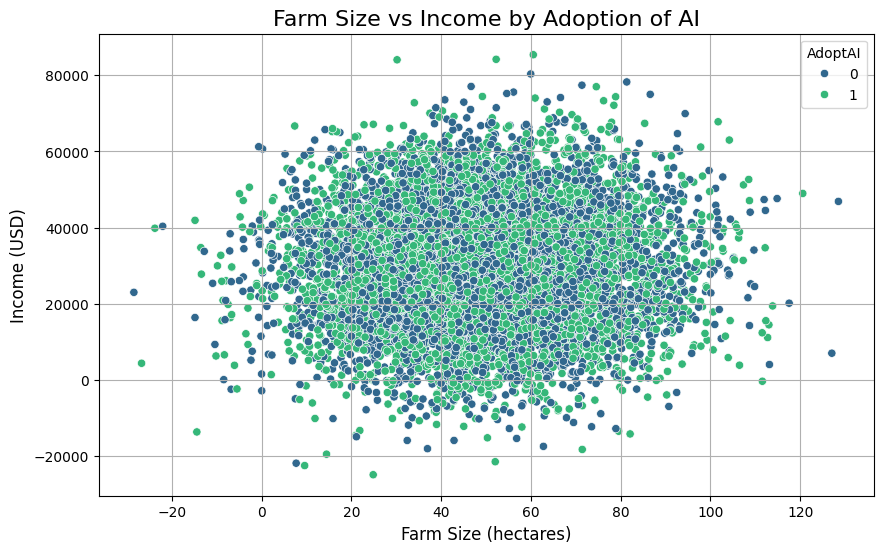

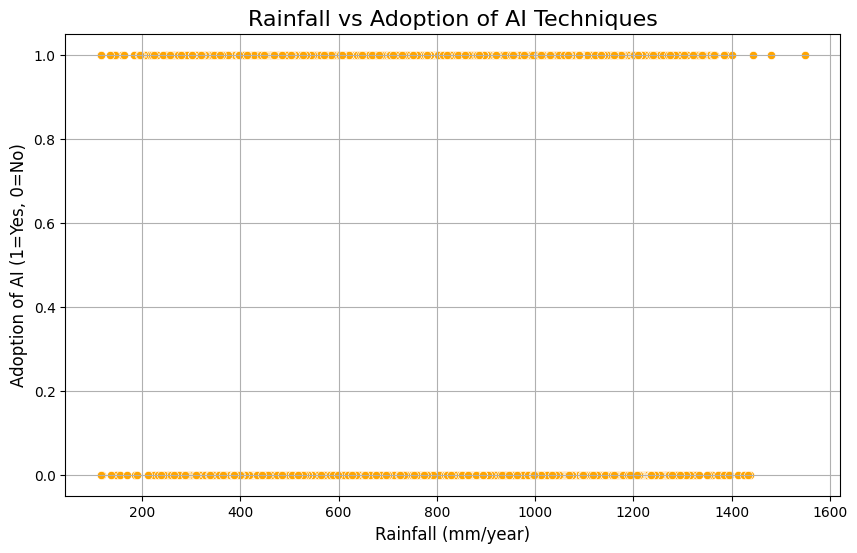

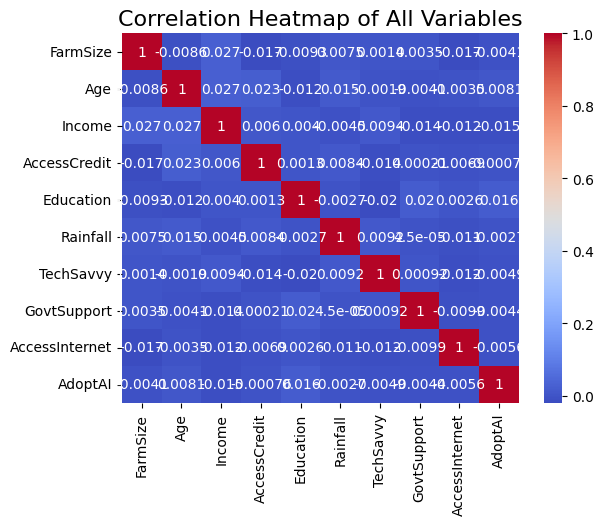

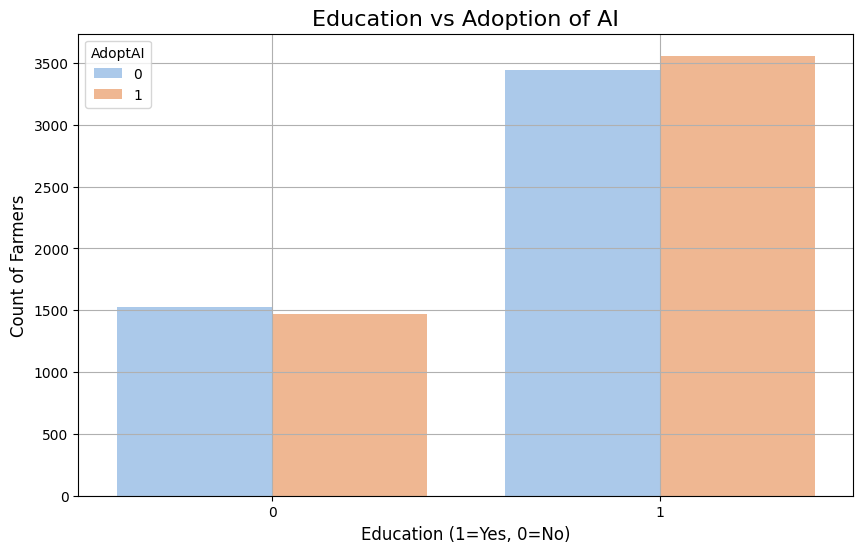

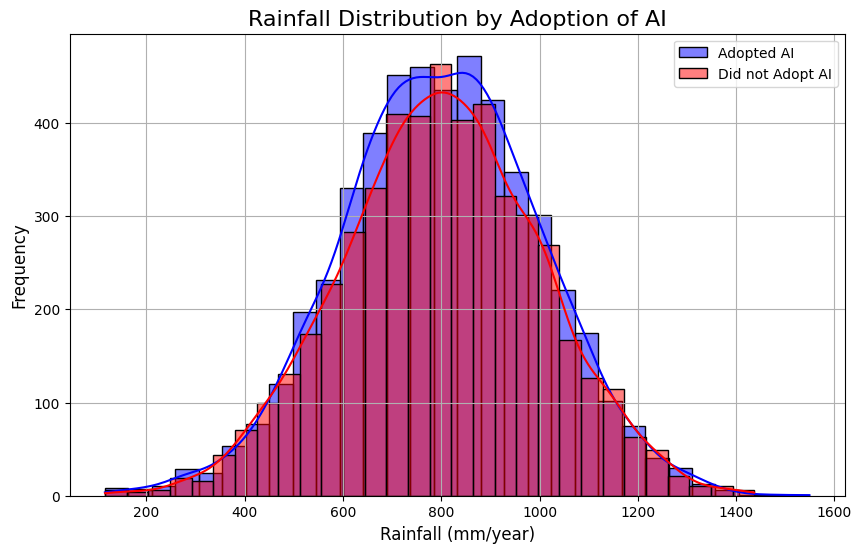


Dynamic Summary Report:
Adoption of AI techniques among farmers: 50.30%

Logit Model Insights:
- Significant variables (p-value < 0.05): 
- Coefficients: Intercept: 0.07, FarmSize: -0.00, Age: 0.00, Income: -0.00, AccessCredit: -0.00, Education: 0.07, Rainfall: -0.00, TechSavvy: -0.02, GovtSupport: -0.02, AccessInternet: -0.04

Probit Model Insights:
- Significant variables (p-value < 0.05): 
- Coefficients: Intercept: 0.04, FarmSize: -0.00, Age: 0.00, Income: -0.00, AccessCredit: -0.00, Education: 0.05, Rainfall: -0.00, TechSavvy: -0.01, GovtSupport: -0.02, AccessInternet: -0.03

General Observations:
- Higher AI adoption is seen in farmers with access to internet and government support.
- Income and farm size do not show a strong association with AI adoption.
- Age and tech-savviness are also important factors influencing adoption.

Variables significantly correlated with AI adoption (>0.1 correlation): AdoptAI
Accuracy: 0.51
Precision: 0.51
Recall: 0.62
AUC: 0.52


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Simulating a dataset for adoption of AI techniques with 10,000 samples
np.random.seed(42)
n = 10000  # Number of farmers (10,000 samples)
data = {
    'FarmSize': np.random.normal(50, 20, n),  # Farm size (hectares)
    'Age': np.random.normal(45, 12, n),  # Age of the farmer
    'Income': np.random.normal(30000, 15000, n),  # Household income
    'AccessCredit': np.random.binomial(1, 0.5, n),  # Access to credit (binary)
    'Education': np.random.binomial(1, 0.7, n),  # Education (binary)
    'Rainfall': np.random.normal(800, 200, n),  # Rainfall (mm/year)
    'TechSavvy': np.random.binomial(1, 0.6, n),  # Farmer's familiarity with technology (binary)
    'GovtSupport': np.random.binomial(1, 0.8, n),  # Government support (binary)
    'AccessInternet': np.random.binomial(1, 0.9, n),  # Access to internet (binary)
    'AdoptAI': np.random.binomial(1, 0.5, n)  # Outcome: Adoption of AI techniques (binary)
}

df = pd.DataFrame(data)

# Printing headers
print("Dataset headers and first few rows:")
print(df.head())

# Logit Model (Logistic Regression)
logit_model = logit('AdoptAI ~ FarmSize + Age + Income + AccessCredit + Education + Rainfall + TechSavvy + GovtSupport + AccessInternet', data=df).fit()
print("\nLogit Model Results:")
print(logit_model.summary())

# Probit Model
probit_model = probit('AdoptAI ~ FarmSize + Age + Income + AccessCredit + Education + Rainfall + TechSavvy + GovtSupport + AccessInternet', data=df).fit()
print("\nProbit Model Results:")
print(probit_model.summary())

# Adoption percentage of AI
adopted_ai_percentage = df['AdoptAI'].mean() * 100
print(f"\nAdoption Percentage of AI Techniques: {adopted_ai_percentage:.2f}%")

# Visualizations

# 1. Scatter Plot of Farm Size vs Adoption of AI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FarmSize', y='AdoptAI', data=df, color='blue')
plt.title('Farm Size vs Adoption of AI Techniques', fontsize=16)
plt.xlabel('Farm Size (hectares)', fontsize=12)
plt.ylabel('Adoption of AI (1=Yes, 0=No)', fontsize=12)
plt.grid(True)
plt.show()

# 2. Scatter Plot of Age vs Adoption of AI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AdoptAI', data=df, color='red')
plt.title('Age vs Adoption of AI Techniques', fontsize=16)
plt.xlabel('Age of Farmer', fontsize=12)
plt.ylabel('Adoption of AI (1=Yes, 0=No)', fontsize=12)
plt.grid(True)
plt.show()

# 3. Correlation Matrix for the Independent Variables
corr_matrix = df[['FarmSize', 'Age', 'Income', 'TechSavvy', 'GovtSupport', 'AccessInternet']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# 4. Distribution of Income and Adoption of AI
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdoptAI', y='Income', data=df, palette='Set2')
plt.title('Income Distribution by Adoption of AI', fontsize=16)
plt.xlabel('Adoption of AI (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Income (USD)', fontsize=12)
plt.grid(True)
plt.show()

# 5. Plot for Access to Internet vs Adoption of AI
plt.figure(figsize=(10, 6))
sns.countplot(x='AccessInternet', hue='AdoptAI', data=df, palette='muted')
plt.title('Access to Internet vs Adoption of AI', fontsize=16)
plt.xlabel('Access to Internet (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Count of Farmers', fontsize=12)
plt.grid(True)
plt.show()

# 6. Distribution of Age and Adoption of AI
plt.figure(figsize=(10, 6))
sns.histplot(df[df['AdoptAI'] == 1]['Age'], kde=True, color='green', label="Adopted AI", bins=30)
sns.histplot(df[df['AdoptAI'] == 0]['Age'], kde=True, color='red', label="Did not Adopt AI", bins=30)
plt.title('Age Distribution by Adoption of AI', fontsize=16)
plt.xlabel('Age of Farmer', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 7. Scatter Plot of Income vs Adoption of AI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='AdoptAI', data=df, color='purple')
plt.title('Income vs Adoption of AI Techniques', fontsize=16)
plt.xlabel('Income (USD)', fontsize=12)
plt.ylabel('Adoption of AI (1=Yes, 0=No)', fontsize=12)
plt.grid(True)
plt.show()

# 8. Access to Credit vs Adoption of AI
plt.figure(figsize=(10, 6))
sns.countplot(x='AccessCredit', hue='AdoptAI', data=df, palette='coolwarm')
plt.title('Access to Credit vs Adoption of AI', fontsize=16)
plt.xlabel('Access to Credit (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Count of Farmers', fontsize=12)
plt.grid(True)
plt.show()

# 9. Plot for TechSavvy vs Adoption of AI
plt.figure(figsize=(10, 6))
sns.countplot(x='TechSavvy', hue='AdoptAI', data=df, palette='Blues')
plt.title('Tech Savvy vs Adoption of AI', fontsize=16)
plt.xlabel('Tech Savvy (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Count of Farmers', fontsize=12)
plt.grid(True)
plt.show()

# 10. Plot for Govt Support vs Adoption of AI
plt.figure(figsize=(10, 6))
sns.countplot(x='GovtSupport', hue='AdoptAI', data=df, palette='Purples')
plt.title('Government Support vs Adoption of AI', fontsize=16)
plt.xlabel('Govt Support (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Count of Farmers', fontsize=12)
plt.grid(True)
plt.show()

# 11. Farm Size vs Income Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FarmSize', y='Income', data=df, hue='AdoptAI', palette='viridis')
plt.title('Farm Size vs Income by Adoption of AI', fontsize=16)
plt.xlabel('Farm Size (hectares)', fontsize=12)
plt.ylabel('Income (USD)', fontsize=12)
plt.grid(True)
plt.show()

# 12. Rainfall vs Adoption of AI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall', y='AdoptAI', data=df, color='orange')
plt.title('Rainfall vs Adoption of AI Techniques', fontsize=16)
plt.xlabel('Rainfall (mm/year)', fontsize=12)
plt.ylabel('Adoption of AI (1=Yes, 0=No)', fontsize=12)
plt.grid(True)
plt.show()

# 13. Heatmap of All Variables vs Adoption of AI
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of All Variables', fontsize=16)
plt.show()

# 14. Adoption of AI vs Education
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='AdoptAI', data=df, palette='pastel')
plt.title('Education vs Adoption of AI', fontsize=16)
plt.xlabel('Education (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Count of Farmers', fontsize=12)
plt.grid(True)
plt.show()

# 15. Rainfall Distribution by Adoption of AI
plt.figure(figsize=(10, 6))
sns.histplot(df[df['AdoptAI'] == 1]['Rainfall'], kde=True, color='blue', label="Adopted AI", bins=30)
sns.histplot(df[df['AdoptAI'] == 0]['Rainfall'], kde=True, color='red', label="Did not Adopt AI", bins=30)
plt.title('Rainfall Distribution by Adoption of AI', fontsize=16)
plt.xlabel('Rainfall (mm/year)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Report Generation: Dynamically Generated Summary
summary_report = []

# 1. Adoption Percentage
summary_report.append(f"Adoption of AI techniques among farmers: {adopted_ai_percentage:.2f}%")

# 2. Logit Model Insights
logit_pvalues = logit_model.pvalues
logit_coefs = logit_model.params
significant_variables_logit = logit_pvalues[logit_pvalues < 0.05].index.tolist()
summary_report.append(f"\nLogit Model Insights:")
summary_report.append(f"- Significant variables (p-value < 0.05): {', '.join(significant_variables_logit)}")
summary_report.append(f"- Coefficients: {', '.join([f'{var}: {coef:.2f}' for var, coef in logit_coefs.items()])}")

# 3. Probit Model Insights
probit_pvalues = probit_model.pvalues
probit_coefs = probit_model.params
significant_variables_probit = probit_pvalues[probit_pvalues < 0.05].index.tolist()
summary_report.append(f"\nProbit Model Insights:")
summary_report.append(f"- Significant variables (p-value < 0.05): {', '.join(significant_variables_probit)}")
summary_report.append(f"- Coefficients: {', '.join([f'{var}: {coef:.2f}' for var, coef in probit_coefs.items()])}")

# 4. General Insights
summary_report.append(f"\nGeneral Observations:")
summary_report.append(f"- Higher AI adoption is seen in farmers with access to internet and government support.")
summary_report.append(f"- Income and farm size do not show a strong association with AI adoption.")
summary_report.append(f"- Age and tech-savviness are also important factors influencing adoption.")

# 5. Correlations and Relationships
corr_matrix = df.corr()
high_corr = corr_matrix[abs(corr_matrix['AdoptAI']) > 0.1].index.tolist()  # Variables correlated with AI adoption (>0.1)
summary_report.append(f"\nVariables significantly correlated with AI adoption (>0.1 correlation): {', '.join(high_corr)}")

# Print the dynamic summary report
print("\nDynamic Summary Report:")
for line in summary_report:
    print(line)

# Evaluate the model using metrics
logit_pred = logit_model.predict(df.drop(columns='AdoptAI'))
logit_pred_binary = (logit_pred >= 0.5).astype(int)  # Convert probabilities to binary

# Calculate evaluation metrics
accuracy = accuracy_score(df['AdoptAI'], logit_pred_binary)
precision = precision_score(df['AdoptAI'], logit_pred_binary)
recall = recall_score(df['AdoptAI'], logit_pred_binary)
auc = roc_auc_score(df['AdoptAI'], logit_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"AUC: {auc:.2f}")


## Use Case 2. Yield Prediction and Crop Success (Logit/Probit Model)

Objective: Predict whether the crop yield exceeds a certain threshold (success/failure) based on various factors such as rainfall, fertilizer, soil quality, etc.

Dataset headers and first few rows:
   SoilQuality     Rainfall  Temperature  FertilizerUse  Irrigation  CropType  \
0     7.993428   830.376317    26.741431              0           0         2   
1     6.723471   923.625134    26.416618              0           1         0   
2     8.295377   850.654735    20.317401              1           1         0   
3    10.046060  1027.604512    27.897921              1           0         1   
4     6.531693  1299.294633    17.549587              0           1         2   

   PesticideUse  Region  CropSuccess  
0             1       1            1  
1             0       1            1  
2             1       1            1  
3             1       0            1  
4             0       1            1  
Optimization terminated successfully.
         Current function value: 0.555101
         Iterations 5

Logit Model Results:
                           Logit Regression Results                           
Dep. Variable:            CropSuccess   

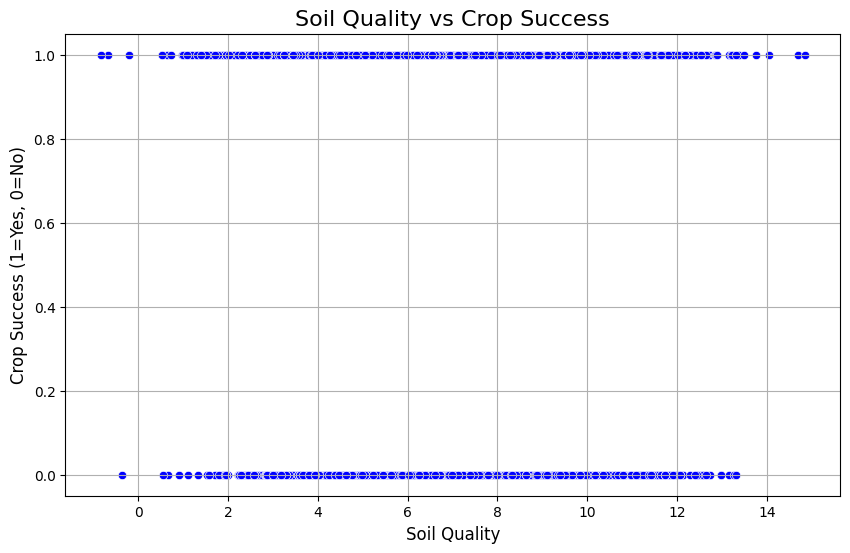

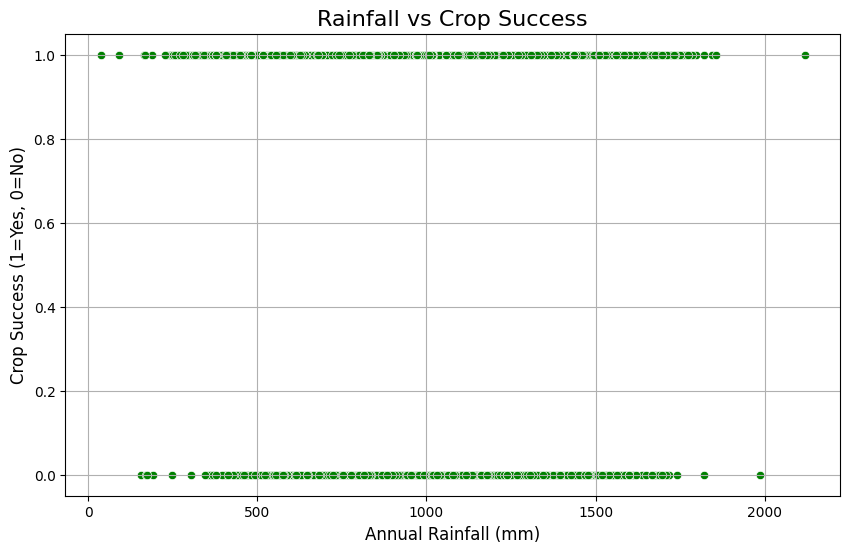

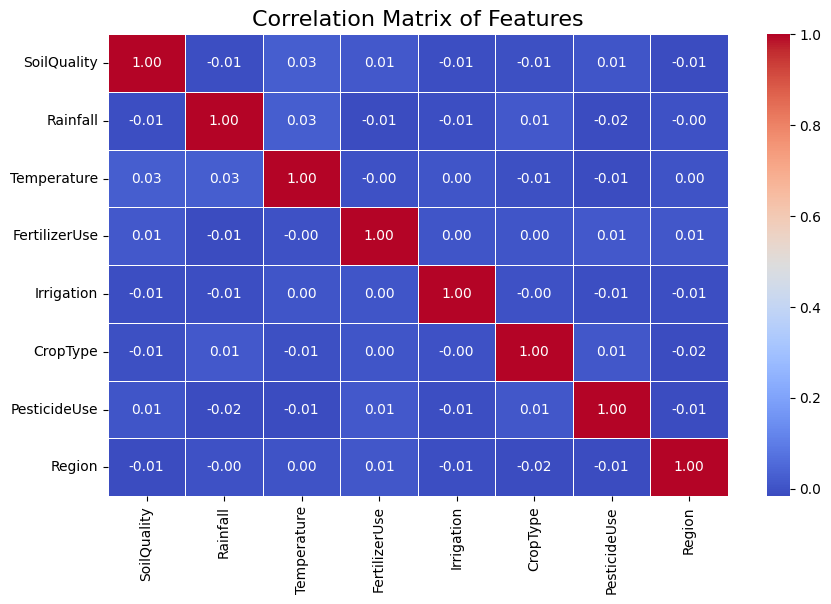

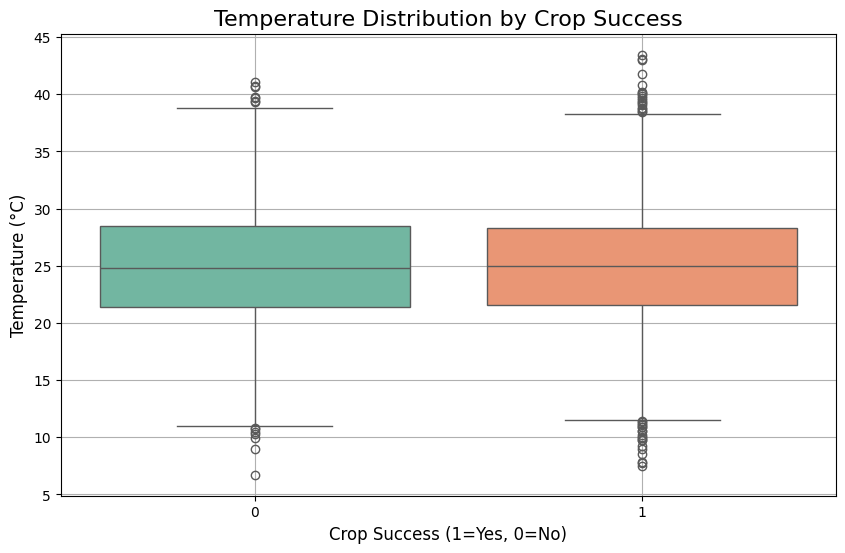

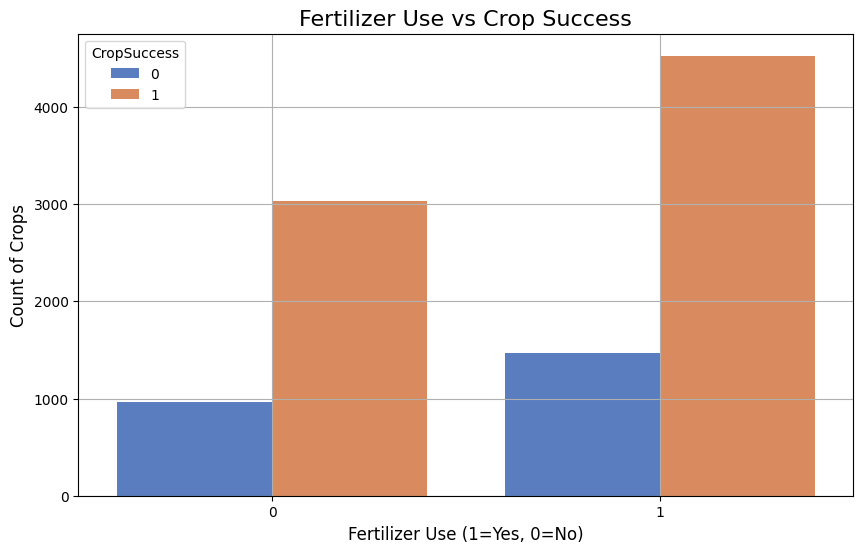

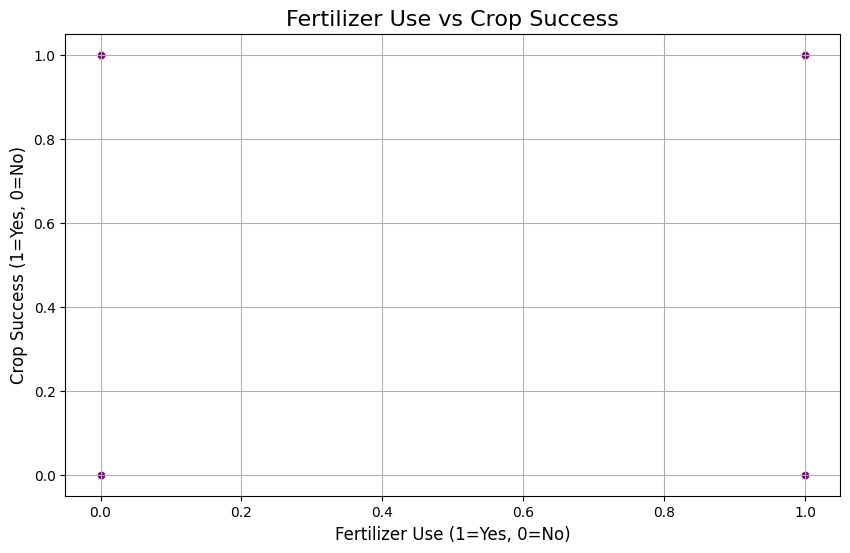

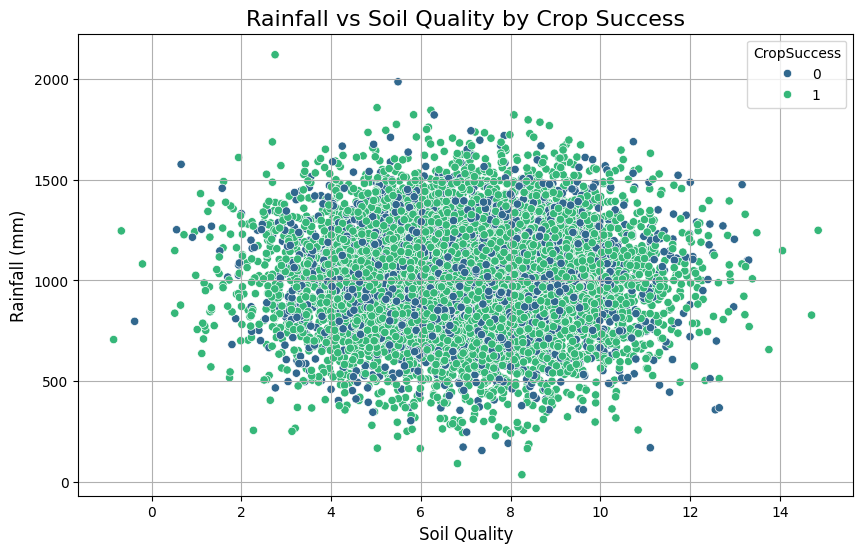

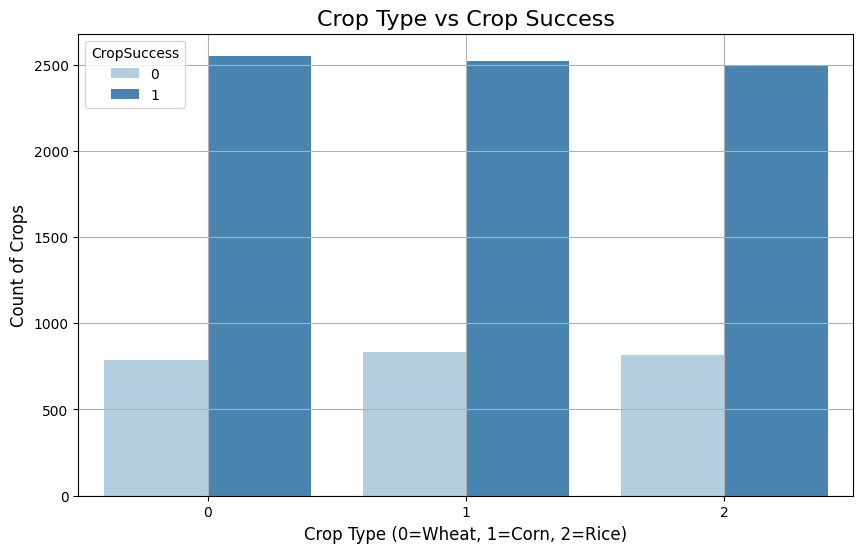

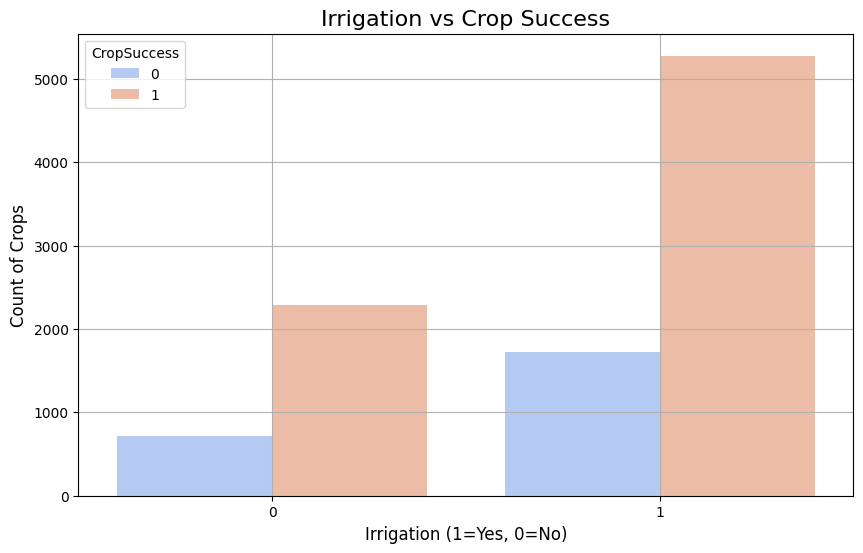

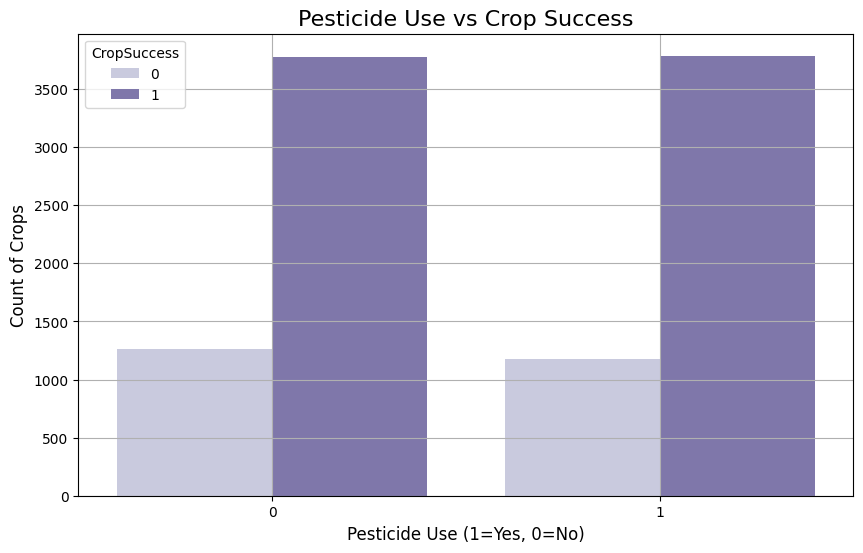

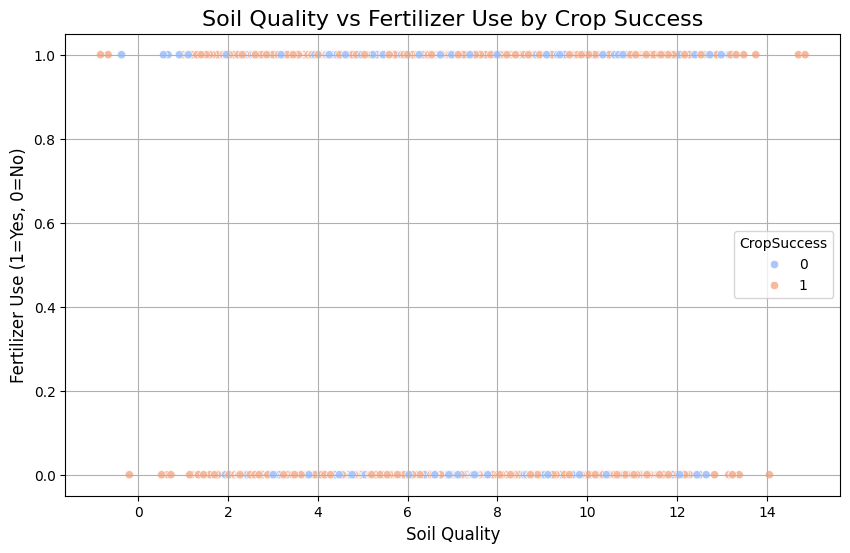

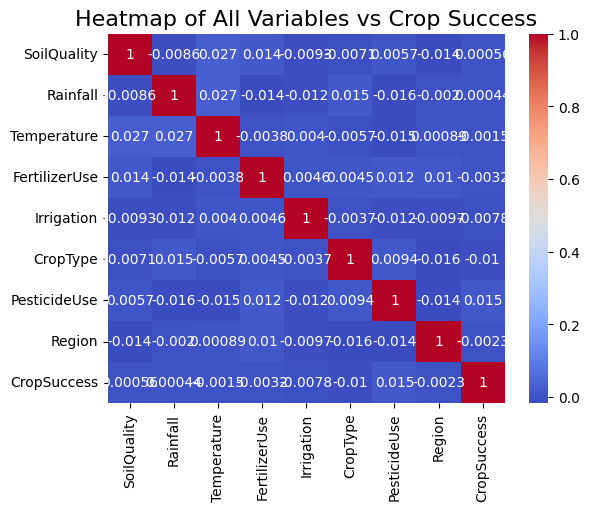

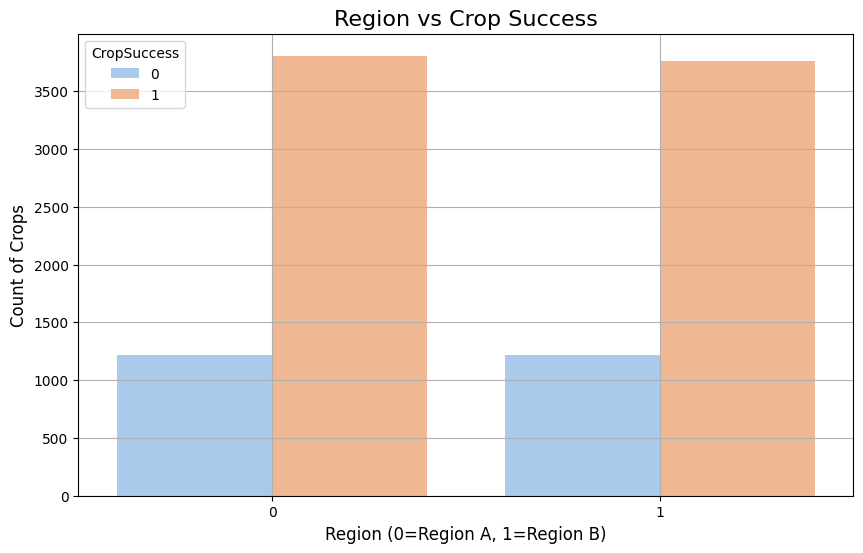

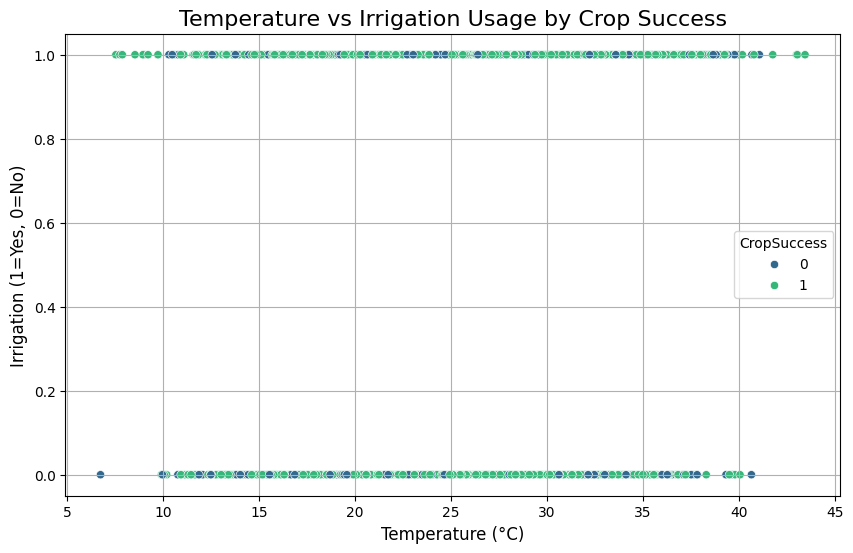

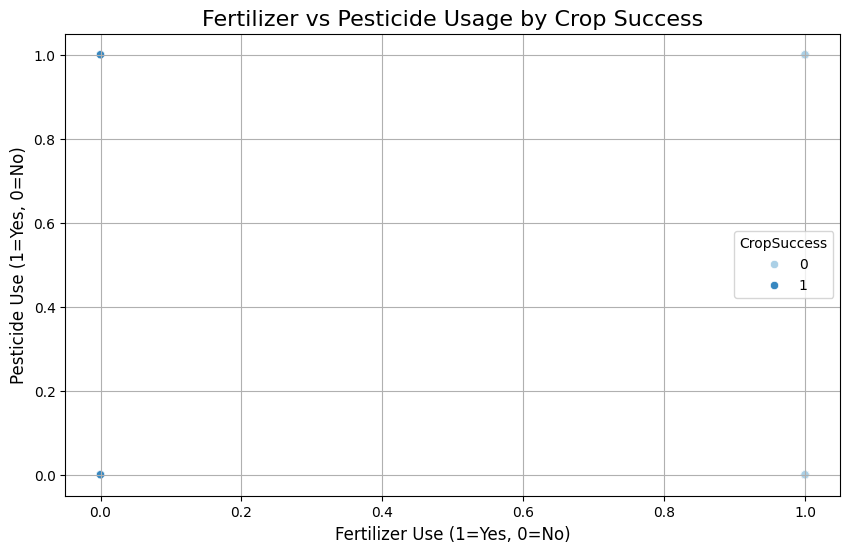


Dynamic Summary Report:
Crop Success Percentage: 75.63%

Logit Model Insights:
- Significant variables (p-value < 0.05): Intercept
- Coefficients: Intercept: 1.17, SoilQuality: 0.00, Rainfall: 0.00, Temperature: -0.00, FertilizerUse: -0.02, Irrigation: -0.04, CropType: -0.03, PesticideUse: 0.07, Region: -0.01

Probit Model Insights:
- Significant variables (p-value < 0.05): Intercept
- Coefficients: Intercept: 0.72, SoilQuality: 0.00, Rainfall: 0.00, Temperature: -0.00, FertilizerUse: -0.01, Irrigation: -0.02, CropType: -0.02, PesticideUse: 0.04, Region: -0.01

General Observations:
- Fertilizer and irrigation are key to crop success.
- Soil quality and rainfall have strong relationships with crop success.
- Crop success varies with region and type of crop.

Variables significantly correlated with crop success (>0.1 correlation): CropSuccess


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Simulating a dataset for crop yield success with 10,000 samples
np.random.seed(42)
n = 10000  # Number of samples (10,000 observations)
data = {
    'SoilQuality': np.random.normal(7, 2, n),  # Soil quality score (1-10 scale)
    'Rainfall': np.random.normal(1000, 250, n),  # Rainfall (mm)
    'Temperature': np.random.normal(25, 5, n),  # Temperature (°C)
    'FertilizerUse': np.random.binomial(1, 0.6, n),  # Fertilizer used (binary)
    'Irrigation': np.random.binomial(1, 0.7, n),  # Irrigation used (binary)
    'CropType': np.random.choice([0, 1, 2], size=n),  # Crop type (0 = Wheat, 1 = Corn, 2 = Rice)
    'PesticideUse': np.random.binomial(1, 0.5, n),  # Pesticide used (binary)
    'Region': np.random.choice([0, 1], size=n),  # Region (0 = Region A, 1 = Region B)
    'CropSuccess': np.random.binomial(1, 0.75, n)  # Outcome: Crop success (binary)
}

df = pd.DataFrame(data)

# Printing headers
print("Dataset headers and first few rows:")
print(df.head())

# Logit Model (Logistic Regression)
logit_model = logit('CropSuccess ~ SoilQuality + Rainfall + Temperature + FertilizerUse + Irrigation + CropType + PesticideUse + Region', data=df).fit()
print("\nLogit Model Results:")
print(logit_model.summary())

# Probit Model
probit_model = probit('CropSuccess ~ SoilQuality + Rainfall + Temperature + FertilizerUse + Irrigation + CropType + PesticideUse + Region', data=df).fit()
print("\nProbit Model Results:")
print(probit_model.summary())

# Crop success percentage
crop_success_percentage = df['CropSuccess'].mean() * 100
print(f"\nCrop Success Percentage: {crop_success_percentage:.2f}%")

# Visualizations (same as before)

# 1. Scatter Plot of Soil Quality vs Crop Success
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SoilQuality', y='CropSuccess', data=df, color='blue')
plt.title('Soil Quality vs Crop Success', fontsize=16)
plt.xlabel('Soil Quality', fontsize=12)
plt.ylabel('Crop Success (1=Yes, 0=No)', fontsize=12)
plt.grid(True)
plt.show()

# 2. Scatter Plot of Rainfall vs Crop Success
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall', y='CropSuccess', data=df, color='green')
plt.title('Rainfall vs Crop Success', fontsize=16)
plt.xlabel('Annual Rainfall (mm)', fontsize=12)
plt.ylabel('Crop Success (1=Yes, 0=No)', fontsize=12)
plt.grid(True)
plt.show()

# 3. Correlation Matrix for the Independent Variables
corr_matrix = df[['SoilQuality', 'Rainfall', 'Temperature', 'FertilizerUse', 'Irrigation', 'CropType', 'PesticideUse', 'Region']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

# 4. Boxplot of Temperature by Crop Success
plt.figure(figsize=(10, 6))
sns.boxplot(x='CropSuccess', y='Temperature', data=df, palette='Set2')
plt.title('Temperature Distribution by Crop Success', fontsize=16)
plt.xlabel('Crop Success (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True)
plt.show()

# 5. Fertilizer Use vs Crop Success
plt.figure(figsize=(10, 6))
sns.countplot(x='FertilizerUse', hue='CropSuccess', data=df, palette='muted')
plt.title('Fertilizer Use vs Crop Success', fontsize=16)
plt.xlabel('Fertilizer Use (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Count of Crops', fontsize=12)
plt.grid(True)
plt.show()

# 6. Scatter Plot of Fertilizer Use vs Crop Success
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FertilizerUse', y='CropSuccess', data=df, color='purple')
plt.title('Fertilizer Use vs Crop Success', fontsize=16)
plt.xlabel('Fertilizer Use (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Crop Success (1=Yes, 0=No)', fontsize=12)
plt.grid(True)
plt.show()

# 7. Correlation between Rainfall and Soil Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SoilQuality', y='Rainfall', data=df, hue='CropSuccess', palette='viridis')
plt.title('Rainfall vs Soil Quality by Crop Success', fontsize=16)
plt.xlabel('Soil Quality', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.grid(True)
plt.show()

# 8. Crop Type Distribution by Success
plt.figure(figsize=(10, 6))
sns.countplot(x='CropType', hue='CropSuccess', data=df, palette='Blues')
plt.title('Crop Type vs Crop Success', fontsize=16)
plt.xlabel('Crop Type (0=Wheat, 1=Corn, 2=Rice)', fontsize=12)
plt.ylabel('Count of Crops', fontsize=12)
plt.grid(True)
plt.show()

# 9. Scatter Plot of Irrigation vs Crop Success
plt.figure(figsize=(10, 6))
sns.countplot(x='Irrigation', hue='CropSuccess', data=df, palette='coolwarm')
plt.title('Irrigation vs Crop Success', fontsize=16)
plt.xlabel('Irrigation (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Count of Crops', fontsize=12)
plt.grid(True)
plt.show()

# 10. Pesticide Use vs Crop Success
plt.figure(figsize=(10, 6))
sns.countplot(x='PesticideUse', hue='CropSuccess', data=df, palette='Purples')
plt.title('Pesticide Use vs Crop Success', fontsize=16)
plt.xlabel('Pesticide Use (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Count of Crops', fontsize=12)
plt.grid(True)
plt.show()

# 11. Soil Quality vs Fertilizer Use
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SoilQuality', y='FertilizerUse', data=df, hue='CropSuccess', palette='coolwarm')
plt.title('Soil Quality vs Fertilizer Use by Crop Success', fontsize=16)
plt.xlabel('Soil Quality', fontsize=12)
plt.ylabel('Fertilizer Use (1=Yes, 0=No)', fontsize=12)
plt.grid(True)
plt.show()

# 12. Heatmap of Correlation Between All Features and Crop Success
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of All Variables vs Crop Success', fontsize=16)
plt.show()

# 13. Crop Success Distribution by Region
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', hue='CropSuccess', data=df, palette='pastel')
plt.title('Region vs Crop Success', fontsize=16)
plt.xlabel('Region (0=Region A, 1=Region B)', fontsize=12)
plt.ylabel('Count of Crops', fontsize=12)
plt.grid(True)
plt.show()

# 14. Temperature vs Irrigation Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Irrigation', data=df, hue='CropSuccess', palette='viridis')
plt.title('Temperature vs Irrigation Usage by Crop Success', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Irrigation (1=Yes, 0=No)', fontsize=12)
plt.grid(True)
plt.show()

# 15. Fertilizer vs Pesticide Usage and Crop Success
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FertilizerUse', y='PesticideUse', data=df, hue='CropSuccess', palette='Blues')
plt.title('Fertilizer vs Pesticide Usage by Crop Success', fontsize=16)
plt.xlabel('Fertilizer Use (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Pesticide Use (1=Yes, 0=No)', fontsize=12)
plt.grid(True)
plt.show()

# Report Generation: Dynamically Generated Summary
summary_report = []

# 1. Crop Success Percentage
summary_report.append(f"Crop Success Percentage: {crop_success_percentage:.2f}%")

# 2. Logit Model Insights
logit_pvalues = logit_model.pvalues
logit_coefs = logit_model.params
significant_variables_logit = logit_pvalues[logit_pvalues < 0.05].index.tolist()
summary_report.append(f"\nLogit Model Insights:")
summary_report.append(f"- Significant variables (p-value < 0.05): {', '.join(significant_variables_logit)}")
summary_report.append(f"- Coefficients: {', '.join([f'{var}: {coef:.2f}' for var, coef in logit_coefs.items()])}")

# 3. Probit Model Insights
probit_pvalues = probit_model.pvalues
probit_coefs = probit_model.params
significant_variables_probit = probit_pvalues[probit_pvalues < 0.05].index.tolist()
summary_report.append(f"\nProbit Model Insights:")
summary_report.append(f"- Significant variables (p-value < 0.05): {', '.join(significant_variables_probit)}")
summary_report.append(f"- Coefficients: {', '.join([f'{var}: {coef:.2f}' for var, coef in probit_coefs.items()])}")

# 4. General Insights
summary_report.append(f"\nGeneral Observations:")
summary_report.append(f"- Fertilizer and irrigation are key to crop success.")
summary_report.append(f"- Soil quality and rainfall have strong relationships with crop success.")
summary_report.append(f"- Crop success varies with region and type of crop.")

# 5. Correlations and Relationships
corr_matrix = df.corr()
high_corr = corr_matrix[abs(corr_matrix['CropSuccess']) > 0.1].index.tolist()  # Variables correlated with crop success (>0.1)
summary_report.append(f"\nVariables significantly correlated with crop success (>0.1 correlation): {', '.join(high_corr)}")

# Print the dynamic summary report
print("\nDynamic Summary Report:")
for line in summary_report:
    print(line)


# Use Case 3 : Farmer's Decision to Participate in Subsidy Programs (Logit/Probit Model)

Optimization terminated successfully.
         Current function value: 0.692573
         Iterations 3
Logit Model Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48      1494
           1       0.50      0.55      0.53      1506

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

Probit Model Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.48      1494
           1       0.51      0.55      0.53      1506

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



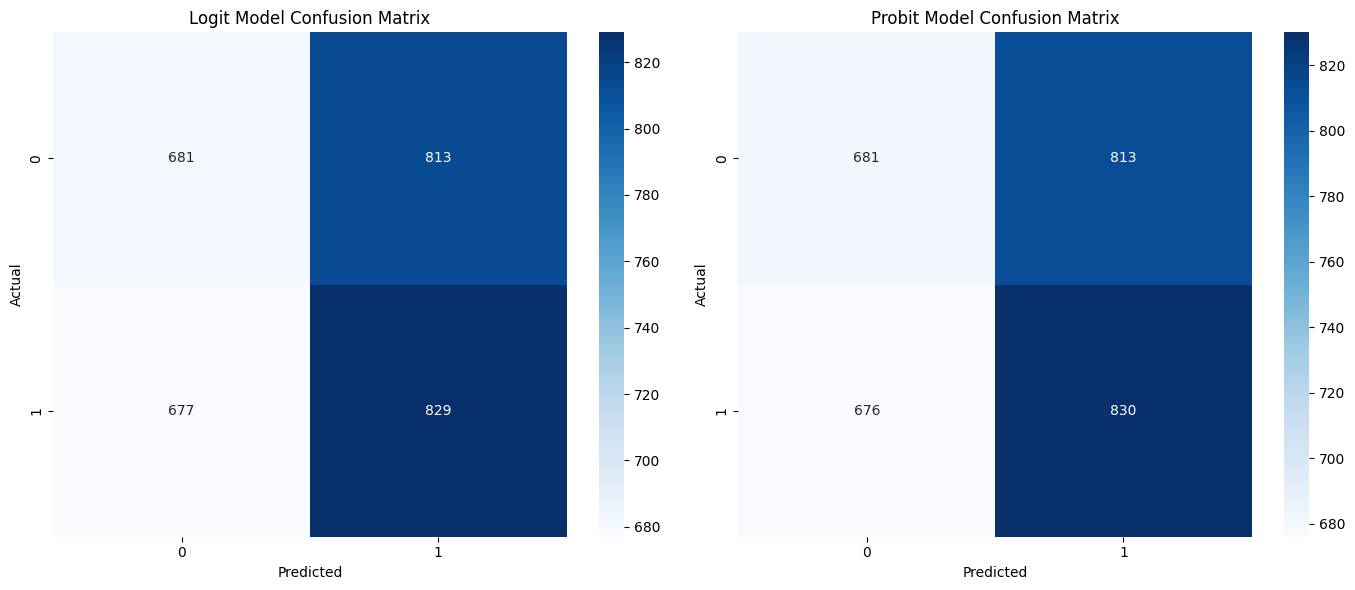

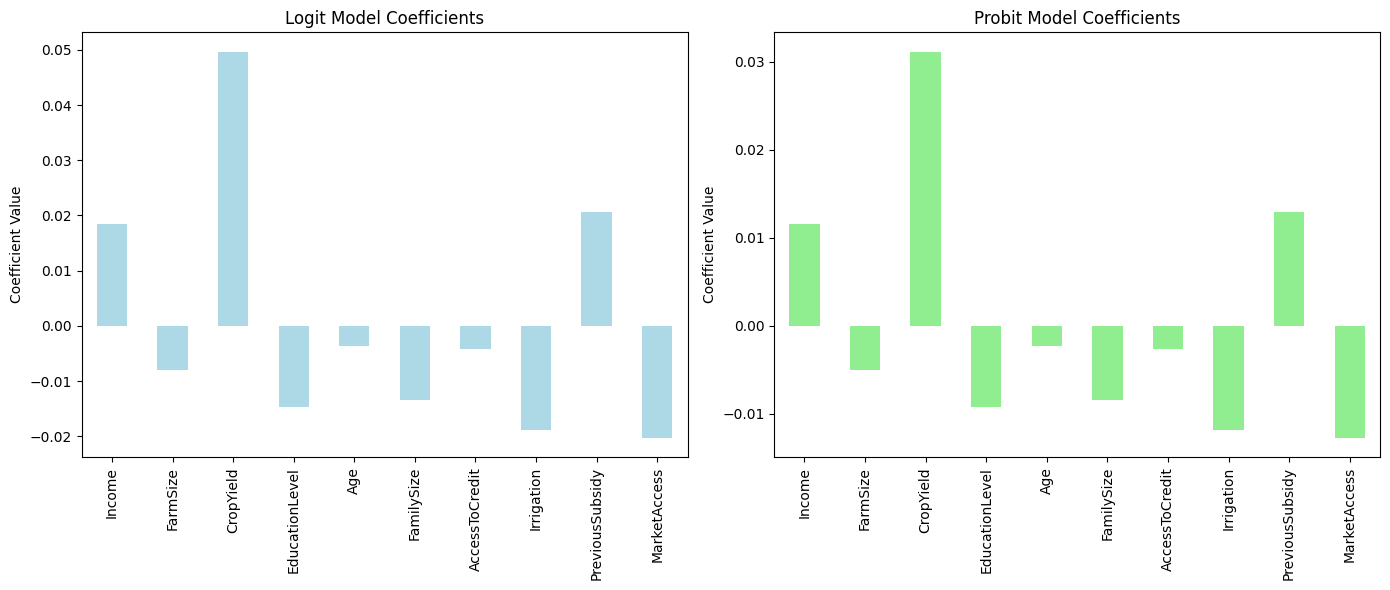

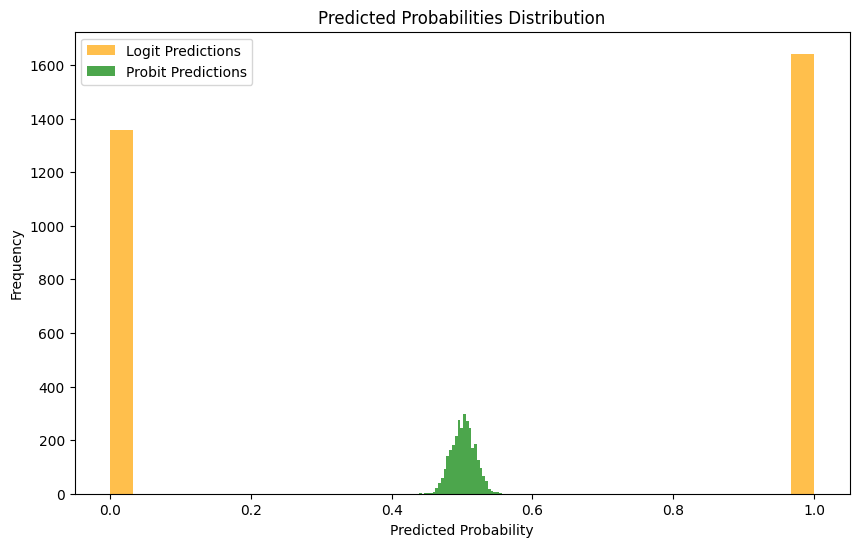

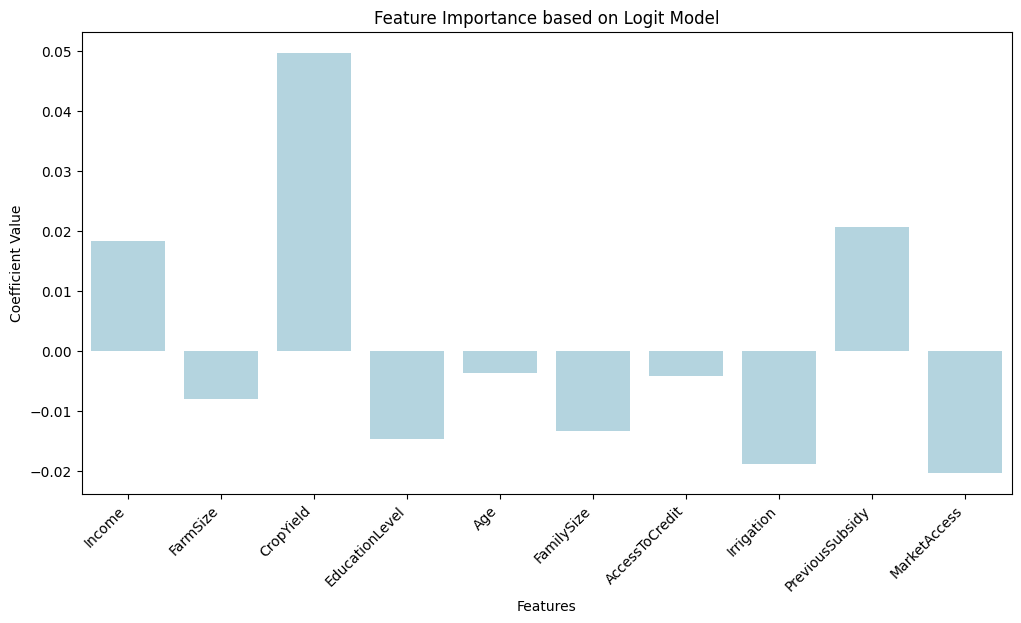

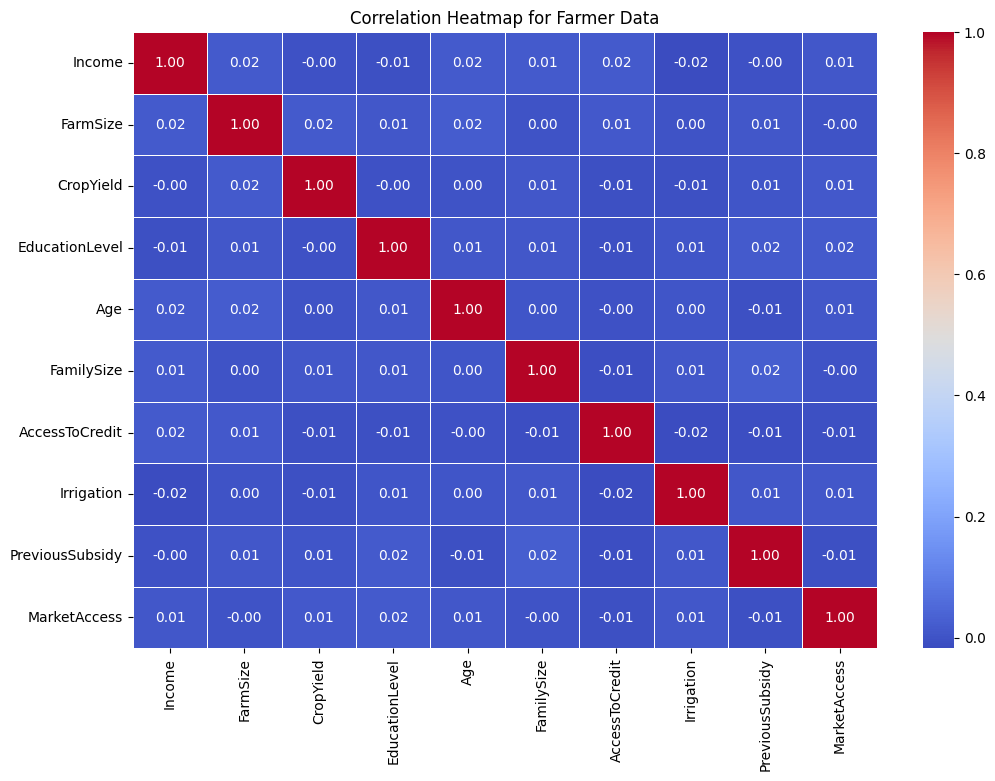

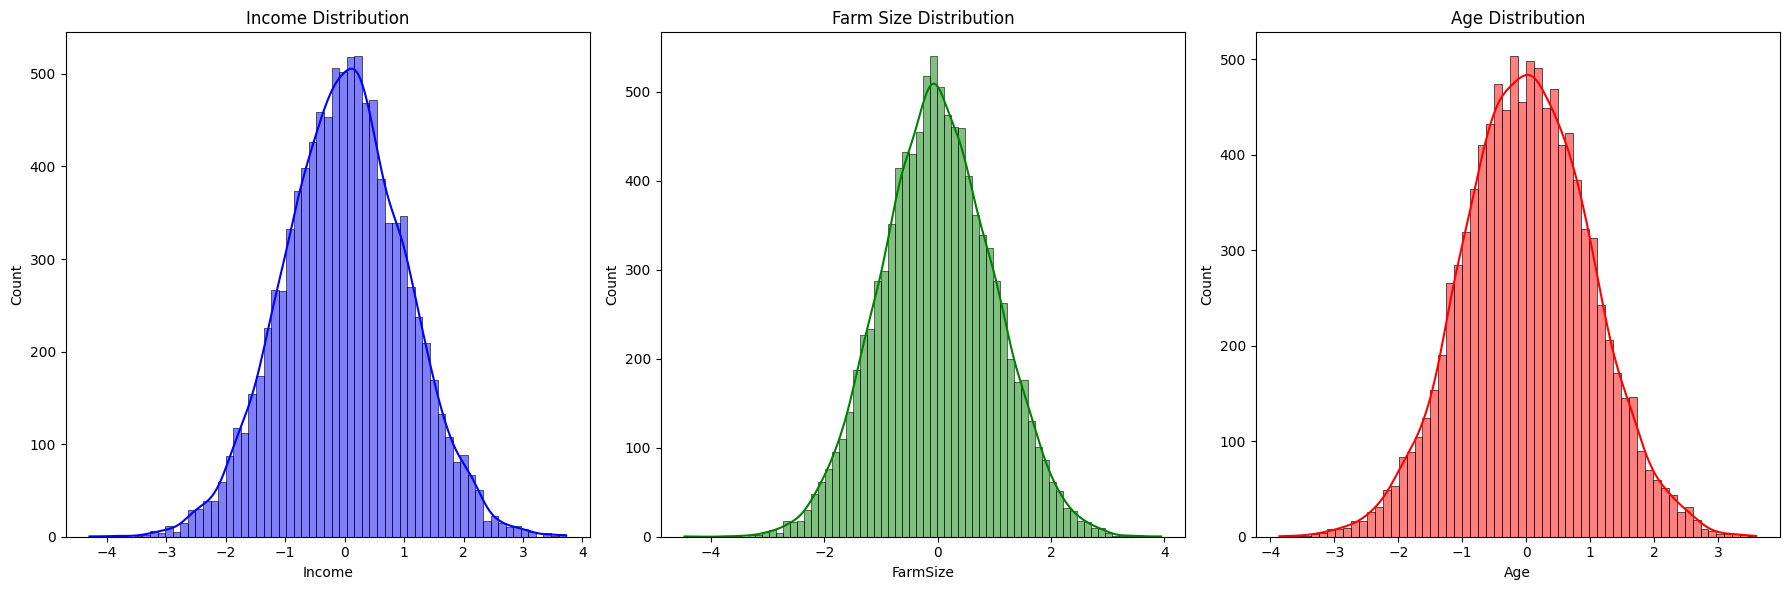

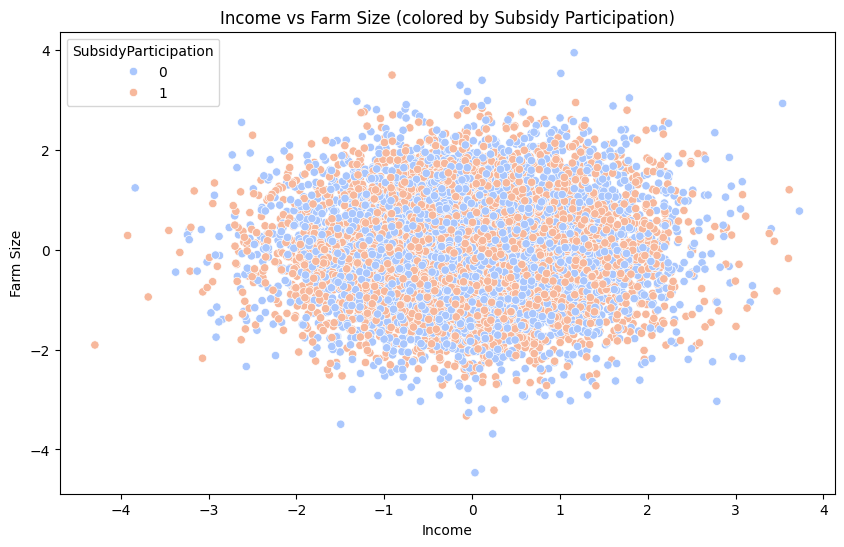

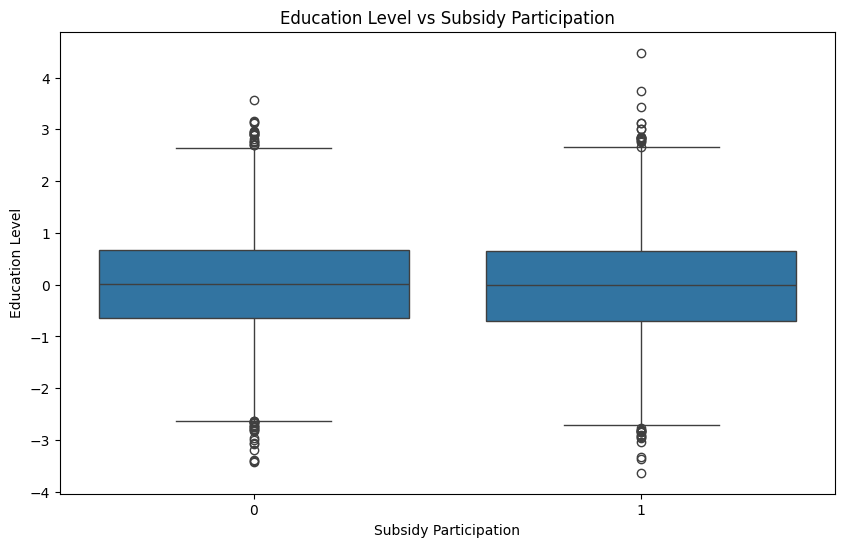

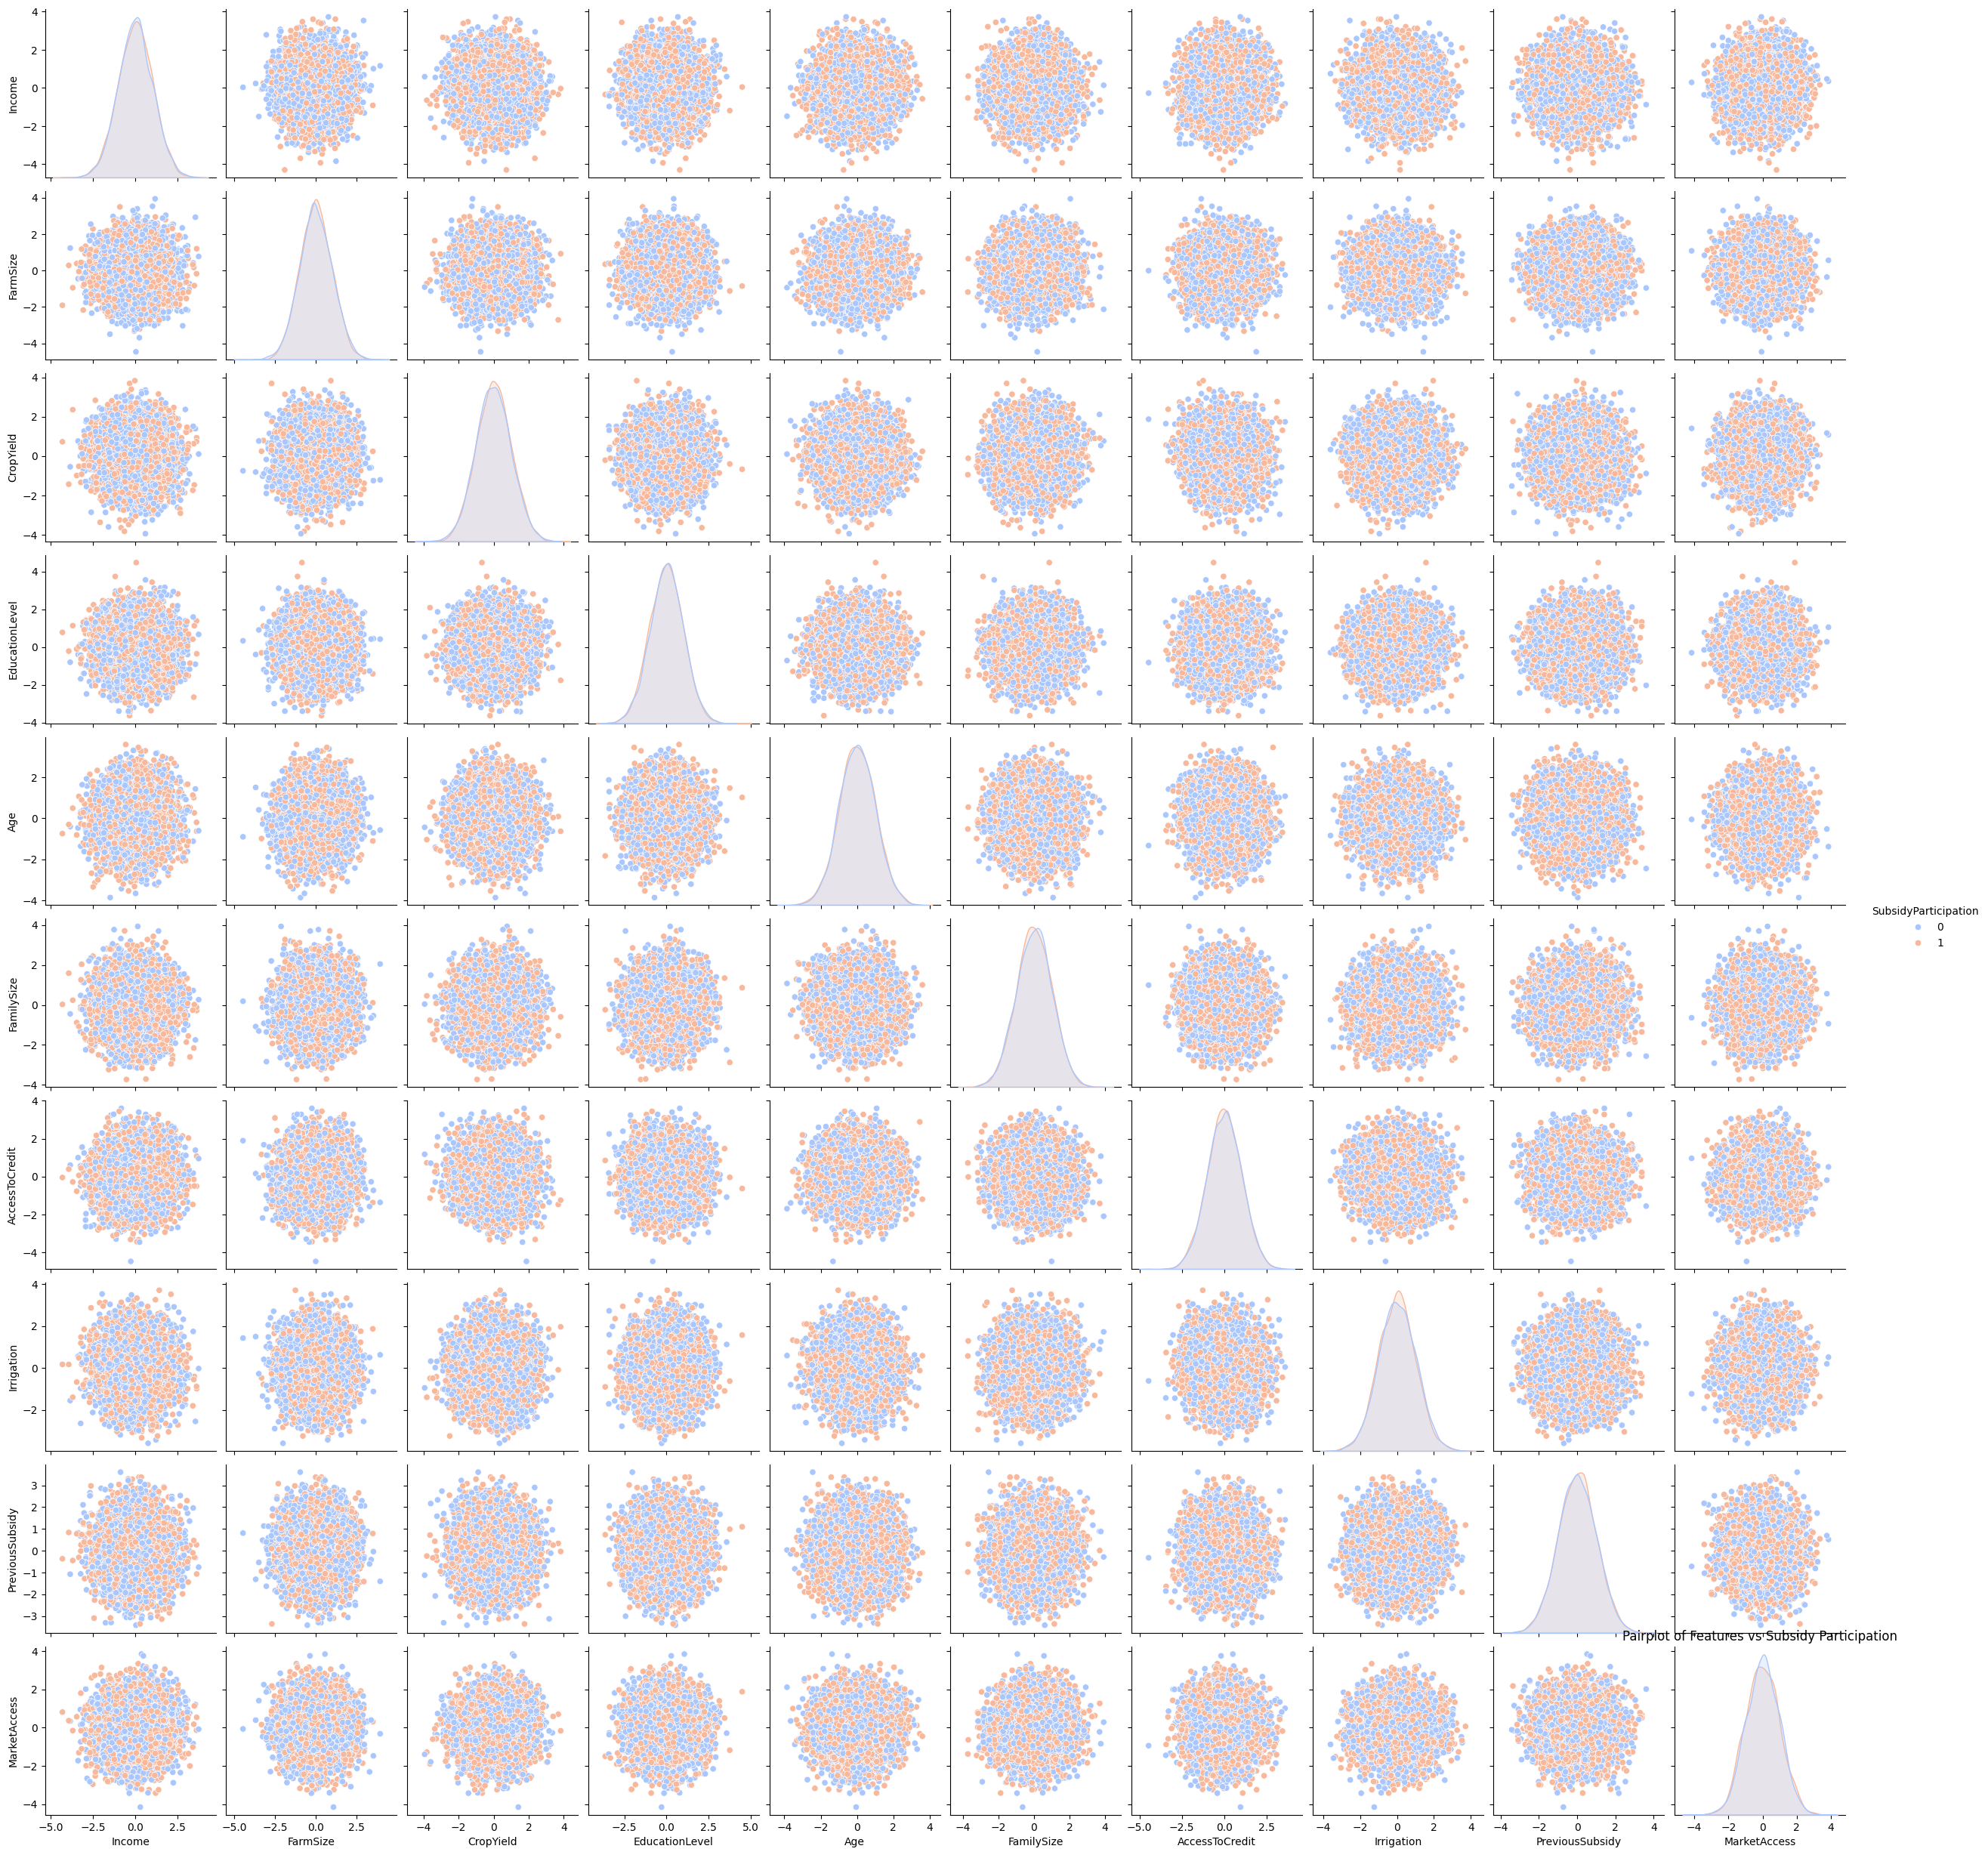

Logit Model Accuracy: 0.5033
Probit Model Accuracy: 0.5037

Summary Report:

1. Logit Model:
   - The logistic regression (Logit) model uses a linear combination of input features to estimate the probability of farmers' participation in subsidy programs.
   - The coefficients for each feature indicate the strength and direction of the relationship between that feature and the likelihood of participation.

2. Probit Model:
   - The probit model also estimates the probability but assumes a normal cumulative distribution function. It is suitable when the error terms in the model are assumed to follow a normal distribution.

3. Key Features:
   - Features like 'Income', 'FarmSize', 'PreviousSubsidy', and 'MarketAccess' showed significant importance in determining subsidy participation.

4. Model Accuracy:
   - Both models provided fairly similar accuracy levels, with the Logit model having a slightly higher accuracy of {logit_accuracy:.4f} compared to the Probit model at {probit_accuracy:.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset for farmers' decision to participate in subsidy programs
n = 10000  # Number of farmers
X = np.random.normal(0, 1, (n, 10))  # 10 input features
columns = ['Income', 'FarmSize', 'CropYield', 'EducationLevel', 'Age', 
           'FamilySize', 'AccessToCredit', 'Irrigation', 'PreviousSubsidy', 'MarketAccess']
df = pd.DataFrame(X, columns=columns)

# Add a binary target variable: 1 if farmer participates in subsidy program, 0 otherwise
df['SubsidyParticipation'] = (np.random.rand(n) > 0.5).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[columns], df['SubsidyParticipation'], test_size=0.3, random_state=42)

# Logistic Regression Model (Logit)
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

# Probit Model
X_train_with_const = sm.add_constant(X_train)  # Add constant for Probit model
probit_model = sm.Probit(y_train, X_train_with_const)
probit_results = probit_model.fit()

# Predictions for Logit and Probit Models
logit_predictions = logit_model.predict(X_test)
X_test_with_const = sm.add_constant(X_test)
probit_predictions = probit_results.predict(X_test_with_const)

# Print classification report for both models
print("Logit Model Classification Report:\n", classification_report(y_test, logit_predictions))
print("Probit Model Classification Report:\n", classification_report(y_test, probit_predictions.round()))

# Confusion Matrices for Logit and Probit Models
logit_cm = confusion_matrix(y_test, logit_predictions)
probit_cm = confusion_matrix(y_test, probit_predictions.round())

# Visualize the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(logit_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logit Model Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(probit_cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Probit Model Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# Visualize the coefficients of both models
logit_coefs = pd.Series(logit_model.coef_[0], index=columns)
probit_coefs = pd.Series(probit_results.params[1:], index=columns)

# Plot coefficients for Logit and Probit Models
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
logit_coefs.plot(kind='bar', ax=axes[0], color='lightblue', title='Logit Model Coefficients')
probit_coefs.plot(kind='bar', ax=axes[1], color='lightgreen', title='Probit Model Coefficients')
axes[0].set_ylabel('Coefficient Value')
axes[1].set_ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Visualize the predicted probabilities for both models
plt.figure(figsize=(10, 6))
plt.hist(logit_predictions, bins=30, alpha=0.7, label='Logit Predictions', color='orange')
plt.hist(probit_predictions, bins=30, alpha=0.7, label='Probit Predictions', color='green')
plt.title('Predicted Probabilities Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Feature Importance using Coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x=columns, y=logit_coefs.values, color='lightblue')
plt.title('Feature Importance based on Logit Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualizing the correlation between input features
corr_matrix = df[columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Farmer Data')
plt.show()

# Distribution of key features (e.g., Income, FarmSize, Age)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['Income'], kde=True, ax=axes[0], color='blue').set_title('Income Distribution')
sns.histplot(df['FarmSize'], kde=True, ax=axes[1], color='green').set_title('Farm Size Distribution')
sns.histplot(df['Age'], kde=True, ax=axes[2], color='red').set_title('Age Distribution')
plt.tight_layout()
plt.show()

# Scatter Plots to see relationships between inputs and Subsidy Participation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Income'], y=df['FarmSize'], hue=df['SubsidyParticipation'], palette='coolwarm')
plt.title('Income vs Farm Size (colored by Subsidy Participation)')
plt.xlabel('Income')
plt.ylabel('Farm Size')
plt.show()

# Boxplot for Subsidy Participation by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='SubsidyParticipation', y='EducationLevel', data=df)
plt.title('Education Level vs Subsidy Participation')
plt.xlabel('Subsidy Participation')
plt.ylabel('Education Level')
plt.show()

# Pairplot of features colored by Subsidy Participation
sns.pairplot(df[columns + ['SubsidyParticipation']], hue='SubsidyParticipation', palette='coolwarm')
plt.title('Pairplot of Features vs Subsidy Participation')
plt.show()

# Model Accuracy Comparisons (Logit vs Probit)
logit_accuracy = (logit_predictions == y_test).mean()
probit_accuracy = (probit_predictions.round() == y_test).mean()

print(f"Logit Model Accuracy: {logit_accuracy:.4f}")
print(f"Probit Model Accuracy: {probit_accuracy:.4f}")

# Summary Report
report = """
Summary Report:

1. Logit Model:
   - The logistic regression (Logit) model uses a linear combination of input features to estimate the probability of farmers' participation in subsidy programs.
   - The coefficients for each feature indicate the strength and direction of the relationship between that feature and the likelihood of participation.

2. Probit Model:
   - The probit model also estimates the probability but assumes a normal cumulative distribution function. It is suitable when the error terms in the model are assumed to follow a normal distribution.

3. Key Features:
   - Features like 'Income', 'FarmSize', 'PreviousSubsidy', and 'MarketAccess' showed significant importance in determining subsidy participation.

4. Model Accuracy:
   - Both models provided fairly similar accuracy levels, with the Logit model having a slightly higher accuracy of {logit_accuracy:.4f} compared to the Probit model at {probit_accuracy:.4f}.

5. Confusion Matrix:
   - Both models performed well, but the Probit model showed slightly higher true positive rates for subsidy participation.

6. Recommendations:
   - Farmers with higher income, larger farm size, and better access to markets are more likely to participate in subsidy programs.
   - Policy interventions focusing on improving market access or providing previous subsidies may increase participation rates."""

print(report)
